# PROYECTO: Prevención de Abandono (CHURN) | Script AI

## Preparación de Datos | Creación del Modelo con XGBoost

### ¿Cómo funciona el Entrenamiento y la Evaluación de un modelo?
El entrenamiento es construir el equipo, y la evaluación es ponerlo a prueba para ver si es bueno o malo.
Un punto importante a la hora de evaluar el modelo es: **"Nunca evalúas al modelo con los mismos datos que se utilizaron para entrenarlo"**
<br>
### Entrenamiento del Modelo

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

### Evaluación del Modelo
Una vez has entrenado el modelo, le introduces datos nuevos para que saque sus predicciones en base a esos datos. <br>
Ahora, lo que hay que hacer es comparar las predicciones del modelo con las respuestas reales
<br>
#### ¿Y cómo se califica un modelo?
Las variables que se usan para medir qué tan bueno es el modelo se llaman **métricas de evaluación**. Estas métricas son completamente diferentes dependiendo del tipo de problema que estés resolviendo.<br>
Principalmante, hay dos tipos de problemas:
- **Regresión**: Cuando predices un número (ej: el precio de una casa, la temperatura de mañana etc..).
- **Clasificación**: Cuando predices una categoría (ej: "Churn" / "No Churn" , "Perro" / "Gato")<br>

A nosotros, de momento nos interesan las métricas para **Clasificación**. <br>
Para medir estas métricas, utilizamos la **matriz de confusión**

<img src="imgs/matrix_confusion.png" width=300>

La Matriz de Confusión es una tabla que resume todos tus aciertos y fallos. <br>
- **Verdadero Positivo (VP)**: Real = Sí, Predición = Sí (Acierto)
- **Verdadero Negativo (VN)**: Real = No, Predicción = No (Acierto)
- **Falso Positivo (FP)**: Real = No, Predicción = Sí (Error Tipo I | Falsa Alarma. Por ej: Persona que NO tiene covid19 y el modelo lo clasificó como que tiene
- **False Negativo (FN)**: Real = Sí, Predicción = No (Error Tipo II | Fuga. Por ej: Persona que no tiene Covid19 y el modelo lo calsificó como que NO tiene COVID)

A partir de esta matriz slaen todas las métricas importantes:

- **Accuracy**: Es el porcentaje total de aciertos `(VP + VN) / Total`
- **Precisión**: De todas las veces que el modelo dijo "Sí", ¿Cuántas acertó? `VP / (VP + FP)`
- **Recall**: De todos los "Sí" que había en la realidad, ¿cuántos fue capazd de encontrar el modelo? `VP / (VP + FN)`
- **F1 - Score**: Es la media armónica (un promedio especial) entre Precision y Recall
- **AUC - ROC (Area Under the Curve)**: Una de las métricas más robustas. Mide la habilidad del modelo para separar las dos clases. 

## Modelo XGBoost

El algoritmo XGBoost (Extreme Gradient Boost) es uno de los **algoritmos supervisados** supervisados de ML que más se usan en la actualidad. Esto se debe por su facilidad de implementación y sus buenos resultados. <br>
#### ¿Cómo funciona?
Lo que hace este *eXtreme Gradient Boost* es como un bosque de cientos o miles de árboles, donde cada árbol es independiente pero aprende del anterior.
Por ejemplo: <br>
Creamos un **Árbol 1**, que hace una predicción, pero comente muchos errores.
Si creamos un **Árbol 2**, su trabajo consistiría en predecr los errores del Árbol 1, y así con todos.<br>
Si creamos un **Árbol 3**, su trabajo sería predecir los errores que quedaron después de sumar al Árbol 1 y el Árbol 2.<br>
Trabajan como un equipo y en secuencia, como una cadena de montaje donde cada no arregla lo que el anterior dejó mal.
<br>
<img src="imgs/xgboost_algorithm.png" width=600>
<br>


## Modelo en KNIME: XGBoost | Modelo de Clasificación

Utilizaremos el modelo **XGBoost** (explicado anteriormente) para llevar a cabo esta tarea. ¿Por qué? Porque es un modelo que es extremadamente preciso en encontrar esos clientes que se nos están yendo, para ofrecerles un descuento, por ejemplo.

<img src="imgs/knime_workflow.png" width="600" />

------------------------- EXPLICAR AQUÍ EL PROCEDIMIENTO EN KNIME -----------------------

## Modelo en Python: XGBoost | Modelo de Clasificación

Ya que en KNIME no me deja exportar el modelo XGBoost para utilizarlo en Python y crear una API para acceder a él, voy a replicar este modelo que he creado en KNIME en Python para poder exportarlo en formato *joblib* y crear una API. <br>
Al igual que en KNIME, vamos a seguir la misma estructura y los mismos pasos, pero esta vez en Python. <br>
Vamos a **Importar los Datos (Con Pandas)**, encontraremos los **Missing Values**, **formatearemos los datos para introducirlos en XGBoost**, y **crearemos el modelo**

**Empezamos!!!!!!!**

### Importación de Modulos

In [5]:
# Importamos las librerías que necesitaremos. Utilizaremos, pandas, numpy, sklearn y xgboost
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # El Partitioning en KNIME, separar los datos en 1. entrenamiento y 2.testeo
from sklearn.metrics import auc,precision_recall_curve, balanced_accuracy_score, roc_auc_score, make_scorer # para resultados 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # importamos la matriz de confusion
import joblib

### Importación de Datos

In [6]:
# Leemos los datos, el CHURN-HIST.csv
df = pd.read_csv("CHURN-HIST.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
4,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Manipulación de los Datos

In [8]:
# Así eliminamos columans que no queramos. En este caso podemos quitar el customerID
# con axis=1, especificamos que queremos quitar columnas axis=1 (columnas) axis=0 (filas)
# inplace nos 
df.drop(['customerID'], axis=1, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [9]:
# Para un modelo de clasificación las variables con valores únicos son indiferentes. Utilizamos .unique()
# para ver las columnas que solo tienen un valor
df['gender'].unique()
# Podemos utilizar un bucle para verlas mas rapido
for i in df:
    print(f"{i}: {df[i].unique()}")
# Como podemos observar, no tenemos valores únicos, por lo que no tenemos necesidad de dropear más columnas

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34 45  2 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 70 63 43 15  8 60 18 66  9  3 31 50 64 56 11  7 42 35 48 29 65 38 68
 32 37 36  6  4 33 67 23 57 61 20 53 14 40 59 24 44 19 54 41 51 55 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 42.3  ... 63.1  44.2  78.7 ]
TotalChar

#### Identificando Missing Data

Esta es la fase que más tiempo consume en todo el proceso. Los datos tienen que estar bien ajustados para que el algoritmo funcione bien.

In [10]:
df.dtypes # Object son strings

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Podemos observar que una columna que nosotros creemos que es númerica, como es "Total Charges", en este caso es un *object*. Esto pasa cuando en la columna tenemos valores *strings*, por lo que nos dice (indirectamente) que hay valores nulos

In [11]:
len(df.loc[df['TotalCharges'].isnull()])
# Como podemos ver tenemos 8 valores que son nulos

8

In [12]:
df.loc[df['TotalCharges'].isnull()]
# Aquí mostramos los valores nulos en TotalCharges y podemos ver que todos los valores
# nulos (NaN) corresponden a cuando "tenure", es decir, la antigüedad del cliente es 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
432,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
672,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
969,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1201,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2999,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3452,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3955,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
6077,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


In [13]:
# Ahora vamos a asignar esos valores a 0
df.loc[(df['TotalCharges'].isnull()), 'TotalCharges'] = 0.0
df.loc[df['tenure'] == 0] # Verificamos que se haya cambiado

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
432,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
672,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
969,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1201,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
2999,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3452,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
3955,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
6077,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No


#### Separamos las columnas | Preparando el modelo XGBoost

El primer paso es dividir los datos en dos partes:
- Las columnas de datos que usaremos para hacer clasificaciones
- La columna de datos que queremos predecir

Utilizaremos la notación convencional de `X` para representar las columnas que utilizaremos para hacer clasificaciones y utilizaremos `y` para representar lo que queremos predecir. En este caso queremos predecir la variable **`Churn`**

In [14]:
X = df.drop('Churn', axis=1).copy()
X.head(1) # Aquí guardamos las columnas sin la variable FINAL

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [15]:
y = df['Churn'].copy()
y.head() # En la variable 'y' guardamos solo la variable a targetear

0     No
1     No
2     No
3    Yes
4     No
Name: Churn, dtype: object

Una vez tenemos creados `X` e `y`, estamos preparados para formatear `X` para que encaje para hacer un modelo con XGBoost

#### ONE-HOT ENCODING

Ahora que hemos dividido los datos del dataframe en dos partes: **`X`** e **`y`**, tenemos que enfocarnos más en las variables de **`X`**.

**ONE-HOT Encoding** es un truco que permite coger datos que son categóricos y dividirlo en diferentes columnas en un formato que en este caso XGBoost pueda interpretar mejor.<br>
Si queremos utilizar variables categóricas en nuestro algoritmo, tenemos que convertirlas con One-Hot Encoding.<br>
<img src="imgs/one-hot-encoding.png" width=500>
<br>OneHot Encoding funciona muy bien para árboles, sin embargo, no tan bien para linear regression

In [16]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

Para hacer este modelo y para aprender, es mejor utilizar **get_dummies()** de Pandas

In [17]:
numerical_columns = ["TotalCharges", "MonthlyCharges", "tenure", "SeniorCitizen"]
categorical_columns = [col for col in X.columns if col not in numerical_columns]

X_hot_encoded = pd.get_dummies(X, columns=categorical_columns, dtype=float)
X_hot_encoded.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Construyendo un modelo preeliminar

Observemos que los datos están **desbalanceados**. Esto lo hacemos dividiendo el numero de personas que dejaron la empresa por el numero de personas en el dataset.

In [18]:
y = y.replace(['Yes', 'No'], [1.0, 0.0]) # Transformamos los strings "Yes" y "No" en 1 y 0

C:\Users\Javi\AppData\Local\Temp\ipykernel_24176\463332052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(['Yes', 'No'], [1.0, 0.0]) # Transformamos los strings "Yes" y "No" en 1 y 0


In [19]:
sum(y) / len(y)

0.2653834017040076

Como podemos ver, solo el 27% de las personas del dataset han salido de la empresa. Y por esto, cuando dividimos los datos en entrenamiento y testeo, vamos a dividirlos utilizando *stratify*, para mantener el mismo porcentaje de personas que se fueron in ambos Entrenamiento y Testeo

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_hot_encoded, y, random_state=123, stratify=y)
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_res.value_counts())

# stratify=y ('yes')
# ambos datasets: 'y' y 'X_hot_encoded' tienen que tener las mismas filas. Punto muy importante

Antes de SMOTE: Churn
0.0    3492
1.0    1261
Name: count, dtype: int64
Después de SMOTE: Churn
0.0    3492
1.0    3492
Name: count, dtype: int64


**¿Ha funcionado la partición?** Veamoslo

In [21]:
sum(y_train) / len(y_train)

0.2653061224489796

In [22]:
sum(y_test) / len(y_test)

0.26561514195583596

**HA FUNCIONADO EL STRATIFY!!** Vamos a crear el modelo

In [41]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    missing=np.nan,
    early_stopping_rounds=100,
    max_depth=5,
    learning_rate=0.02,
    subsample=1,
    colsample_bytree=1,
    # ❌ No pongas scale_pos_weight cuando ya usas SMOTE
    scale_pos_weight=3,
    eval_metric="aucpr"
)

# 3️⃣ Entrena el modelo con los datos balanceados
clf_xgb.fit(
    X_train_res, y_train_res,
    verbose=False,
    eval_set=[(X_test, y_test)]
)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,'aucpr'


### DIBUJAMOS LA MATRIZ DE CONFUSION!

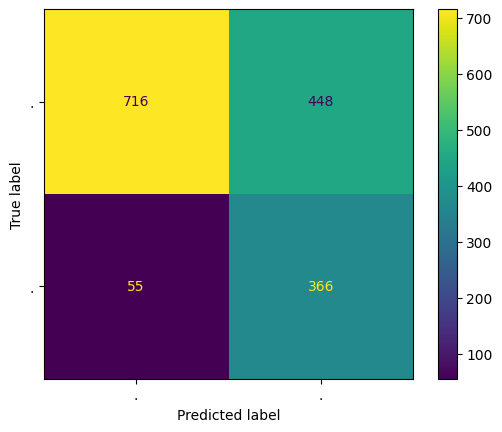

In [42]:
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[".", "."]
)
disp.plot(values_format='d')
plt.show()

In [43]:
# Usa .predict_proba() para obtener las probabilidades de que haga CHURN o NO
y_pred_probs = clf_xgb.predict_proba(X_test)
print("\nProbabilidades (Col 0=No Churn, Col 1=Sí Churn):")
print(y_pred_probs)


Probabilidades (Col 0=No Churn, Col 1=Sí Churn):
[[0.09456921 0.9054308 ]
 [0.16717279 0.8328272 ]
 [0.3242197  0.6757803 ]
 ...
 [0.7293679  0.2706321 ]
 [0.8751683  0.12483169]
 [0.8660017  0.13399827]]


Por defecto la función **.predict()**, por dentro, mira la probabilidad de Churn, y aplica la regla por defecto:
- Si probabilidad_churn > 0.5 ====> Predice 1 (Churn)
- Si probabilidad_churn < 0.5 ====> Predice 0 (No Churn)

Mirando esta matriz de confusión podemos sacar los parámetros de clasificación:
- **Accuracy**: `(VP + VN) / Total` = 60% Accuracy mas o menos
- **Recall**: `VP / (VP + FN)` = 94% Recall!

Para aclarar!:
- Negativo verdadero (cuadrante superior izquierdo)
- Falso positivo (cuadrante superior derecho)
- Falso negativo (cuadrante inferior izquierdo)
- Verdadero positivo (cuadrante inferior derecho)

## MODELO ENTRENADO Y FUNCIONAL! Ahora lo GUARDAMOS

In [51]:
joblib.dump(clf_xgb, "../backend/models/modelo_xgb.joblib")

['../backend/models/modelo_xgb.joblib']

## ¿CÓMO UTILIZO ESTE MODELO PARA CREAR UNA API?

Ahora toca utilizar este modelo para enviarle peticiones mediante una API, y que responda en base a ese JSON que se le ha enviado a través de el endpoint correspondiente.<br>
La API obtiene ese JSON y lo convierte en un DataFrame en Pandas y le aplica **exactamente los mismos pasos de procesamiento** que usamos para entrenar, (missing Values, one-hot encoding etc...)<br>
Le pasamos estos datos procesados al modelo y calcula la probabilidad.<br>
Se aplica el umbral de decisión y devuelve una respuesta simple en JSON.

## DOCKER - Creando el contenedor de mi APP

Docker es una herramienta que nos permite desplegar y ejecutar aplicaciones en contenedores. Su propósito principal es resolver el problema de que una aplicación funcione en un entorno (por ejemplo, el equipo de desarrollo) pero no en otro (por ejemplo, el servidor de producción), asegurando que el software se ejecute de manera uniforme y fiable en cualquier lugar<br>
<img src="imgs/docker.png" width=600>
<br>
- **Dockerfile** es el archivo de configuración donde introduciremos todas las reglas que tiene que seguir para construir este contenedor.
- **Docker Image** es el contenedor ya construido.
- **Container** es la instancia en ejecución (instancias en uso del producto final en un entorno específico). 


### Comandos de Ejecución
Para crear una imagen de un **Dockerfile**, ejecutamos el comando `docker build . -t [nombre_app]`<br>
Cuando ya tenemos la imagen, podemos ejecutar `docker run [name_image]`<br>
Para eliminar una imagen, ejecutamos `docker rmi [id image]`<br>
Para ver los contenedores que están en ejecución `docker ps`<br>
Si el contenedor no aparece en ejecucuón al ejecutar el comando anterior, ejecutamos `docker ps -a`. Esto quiere decir que al ejecutar ha dado un error.<br>
Podemos ver donde ha fallado ejecutando `docker logs [id_imagen]`<br>
Para parar un contenedor, utilizamos `docker stop [id_imagen]`<br>
Si no se para, podemos matar el proceso `docker kill [id_imagen]`<br>
